In [ ]:
# Placement Predictor App

"""This project predicts whether a student will get placed or not based on three features. 
We use Logistic Regression for binary classification.

Dataset includes: CGPA, IQ, Attendance, and Placement status."""

In [43]:
#import the essential libraries
import numpy as np
import pandas as pd

In [45]:
#load the data
df = pd.read_csv(r'C:\Users\ADMIN\Downloads\placement.csv')

In [47]:
#Step-1 : Cleaning the data and Preprocessing
df.head()

,Unnamed: 0,cgpa,iq,attendance,placement
0,0,6.5,110,0.70,1
1,1,7.5,90,0.80,1
2,2,7.8,120,0.85,1
3,3,5.5,140,0.50,0
4,4,4.0,120,0.70,0


In [49]:
df = df.drop(columns=['Unnamed: 0'])

In [51]:
df.head()

,cgpa,iq,attendance,placement
0,6.5,110,0.70,1
1,7.5,90,0.80,1
2,7.8,120,0.85,1
3,5.5,140,0.50,0
4,4.0,120,0.70,0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cgpa        51 non-null     float64
 1   iq          51 non-null     int64  
 2   attendance  51 non-null     float64
 3   placement   51 non-null     int64  
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [55]:
df.describe()

,cgpa,iq,attendance,placement
count,51.000000,51.000000,51.000000,51.000000
mean,5.750980,120.450980,0.574314,0.490196
std,1.801485,24.773626,0.200113,0.504878
min,2.100000,90.000000,0.120000,0.000000
25%,4.500000,99.500000,0.475000,0.000000
50%,5.600000,116.000000,0.600000,0.000000
75%,6.600000,137.500000,0.700000,1.000000
max,9.900000,175.000000,0.950000,1.000000


In [57]:
df.duplicated().sum()

0

In [59]:
df.drop_duplicates(inplace=True)

In [61]:
# Create synthetic data for "low IQ, not placed" scenario
synthetic_data_low_iq = {
    'cgpa': [7.0, 8.0, 9.0, 7.5, 8.5, 6.0, 7.2, 8.8, 9.1, 6.5], 
    'iq': [10, 25, 40, 55, 65, 15, 20, 60, 30, 50],
    'attendance': np.random.uniform(0.6, 0.9, 10),
    'placement': [0] * 10 
}
df_synthetic_low_iq = pd.DataFrame(synthetic_data_low_iq)

# Create synthetic data for "Very low CGPA, not placed" scenario 
synthetic_data_low_cgpa = {
    'cgpa': [0.5, 3.0, 1.5, 2.0, 1.8],
    'iq': np.random.randint(90, 150, 5,),
    'attendance': np.random.uniform(0.5, 0.9, 5),
    'placement': [0] * 5
}


In [63]:
df_synthetic_low_cgpa = pd.DataFrame(synthetic_data_low_cgpa)

In [65]:
print(df.columns)

Index(['cgpa', 'iq', 'attendance', 'placement'], dtype='object')


In [67]:
# Concatenate with your original (cleaned) DataFrame
df_augmented = pd.concat([df, df_synthetic_low_iq, df_synthetic_low_cgpa], ignore_index=True)

print(df_augmented.describe())

# Check your new low IQ entries
print(df_augmented[df_augmented['iq'] < 90]) 

            cgpa          iq  attendance  placement
count  66.000000   66.000000   66.000000  66.000000
mean    5.753030  107.287879    0.606984   0.378788
std     2.134639   37.995451    0.190872   0.488802
min     0.500000   10.000000    0.120000   0.000000
25%     4.500000   92.250000    0.505613   0.000000
50%     5.750000  110.000000    0.610209   0.000000
75%     7.425000  130.000000    0.750000   1.000000
max     9.900000  175.000000    0.950000   1.000000
    cgpa  iq  attendance  placement
51   7.0  10    0.695550          0
52   8.0  25    0.809579          0
53   9.0  40    0.771173          0
54   7.5  55    0.819503          0
55   8.5  65    0.610418          0
56   6.0  15    0.699521          0
57   7.2  20    0.693152          0
58   8.8  60    0.886340          0
59   9.1  30    0.756039          0
60   6.5  50    0.809772          0


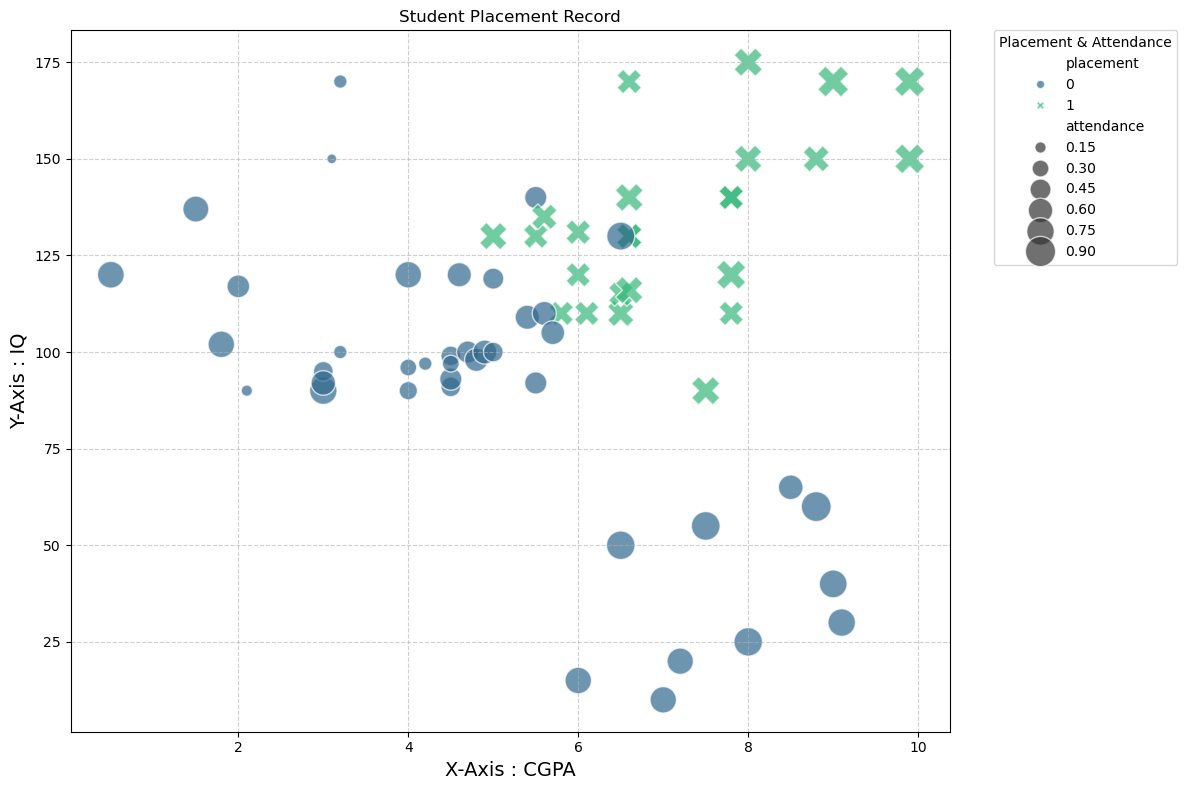

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))

sns.scatterplot(
                data=df_augmented,
                x='cgpa',
                y='iq',
                hue='placement', #colour based on placed or not (0 or 1)
                size='attendance', #size based on attendance
                sizes=(50,500), #Range of dot sizes
                style='placement', #Symbol for placed or not
                palette='viridis', #color palatte
                alpha=0.7 #Transparency for overlapping points
               )

plt.title('Student Placement Record')
plt.xlabel('X-Axis : CGPA', fontsize=14)
plt.ylabel('Y-Axis : IQ', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

#Customizing the legend for clarity
handles, labels = plt.gca().get_legend_handles_labels()
filtered_labels = []
filtered_handles = []
for h, l in zip(handles, labels):
    if l not in filtered_labels:
        filtered_labels.append(l)
        filtered_handles.append(h)

plt.legend(filtered_handles, filtered_labels, title="Placement & Attendance",
           bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()
plt.show()

In [70]:
#Step-2 : Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

# with 'cgpa', 'iq', 'attendance' as features and 'placement' as the label.

# 1. Separate features (x) and label (y)
x = df_augmented[['cgpa', 'iq', 'attendance']]
y = df_augmented['placement']

print("--- Original DataFrame Shapes ---")
print(f"x (features) shape: {x.shape}")
print(f"y (labels) shape: {y.shape}")

# random_state=42 ensures we get the same split every time we run the code
# stratify=y keeps the class distribution (e.g., placed vs. not placed) balanced in both sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

print("\n--- Shapes of Training and Testing Sets ---")
print(f"x_train (training features) shape: {x_train.shape}")
print(f"y_train (training labels) shape: {y_train.shape}")
print(f"x_test (testing features) shape: {x_test.shape}")
print(f"y_test (testing labels) shape: {y_test.shape}")

print("\n--- Distribution of Placement in Splits (Check for Stratification) ---")
print("y_train value counts:")
print(y_train.value_counts(normalize=True)) # normalize=True to see proportions
print("\ny_test value counts:")
print(y_test.value_counts(normalize=True))

--- Original DataFrame Shapes ---
x (features) shape: (66, 3)
y (labels) shape: (66,)

--- Shapes of Training and Testing Sets ---
x_train (training features) shape: (52, 3)
y_train (training labels) shape: (52,)
x_test (testing features) shape: (14, 3)
y_test (testing labels) shape: (14,)

--- Distribution of Placement in Splits (Check for Stratification) ---
y_train value counts:
placement
0    0.615385
1    0.384615
Name: proportion, dtype: float64

y_test value counts:
placement
0    0.642857
1    0.357143
Name: proportion, dtype: float64


In [71]:
#Step-3 : Scaling the training and testing datasets
from sklearn.preprocessing import StandardScaler

# 1. Create object of StandardScaler
scaler = StandardScaler()

# 2. Fit the scaler on the training data ONLY
# The scaler learns the mean and standard deviation for each feature from x_train
scaler.fit(x_train)

# 3. Transform both the training and testing data using the fitted scaler
# This applies the learned mean and standard deviation to both datasets
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Convert the scaled NumPy arrays back to DataFrames for easier inspection
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.columns, index=x_train.index)
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=x_test.columns, index=x_test.index)


print("\n--- Statistics of Scaled Training Data (x_train_scaled_df) ---")
print(x_train_scaled_df.describe())

print("\n--- Statistics of Scaled Testing Data (x_test_scaled_df) ---")
print(x_test_scaled_df.describe())

print("\nFeatures successfully scaled!")


--- Statistics of Scaled Training Data (x_train_scaled_df) ---
               cgpa            iq    attendance
count  5.200000e+01  5.200000e+01  5.200000e+01
mean  -2.220446e-16  1.024821e-16  1.067522e-16
std    1.009756e+00  1.009756e+00  1.009756e+00
min   -2.547761e+00 -2.570182e+00 -2.713625e+00
25%   -6.087407e-01 -3.057485e-01 -5.235356e-01
50%   -5.127218e-02  1.526111e-01 -8.250202e-03
75%    7.364550e-01  7.135885e-01  6.267794e-01
max    2.008937e+00  1.808179e+00  1.866996e+00

--- Statistics of Scaled Testing Data (x_test_scaled_df) ---
            cgpa         iq  attendance
count  14.000000  14.000000   14.000000
mean   -0.006259   0.434077   -0.122795
std     1.163523   1.115967    1.239099
min    -2.063006  -1.749239   -2.548060
25%    -0.608741  -0.298907   -0.906211
50%     0.360770   0.576765    0.073380
75%     0.918238   1.171948    0.850868
max     1.572658   1.945002    1.515668

Features successfully scaled!


In [75]:
#Step-4 : Use Logistic Regression to train the model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Initialize the Logistic Regression model
# random_state: Makes sure we get the same results every time we run the code
# solver='liblinear': A good choice for small datasets and yes/no (binary) problems
# class_weight='balanced': Helps if one class has fewer examples than the other
LR_model = LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced')

# 2. Train the model
LR_model.fit(x_train_scaled, y_train)

# 3. Make predictions on the test set
y_pred_LR = LR_model.predict(x_test_scaled)

# Step-5 : Evaluate the model
print("--- Logistic Regression Classifier Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_LR):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_LR))
print(classification_report(y_test, y_pred_LR))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_LR))

# Interpret coefficients
print("\nLogistic Regression Coefficients (after scaling):")
# Convert coefficients to a DataFrame for better readability
coefficients_df = pd.DataFrame({
    'feature': x_train.columns,
    'coefficient': LR_model.coef_[0] # For binary classification, coef_ is a 2D array, we need the first row
})
coefficients_df = coefficients_df.sort_values('coefficient', ascending=False)
print(coefficients_df)
# Higher positive coefficient means feature increases log-odds of being 1 (placed)
# Higher negative coefficient means feature decreases log-odds of being 1 (placed)

--- Logistic Regression Classifier Evaluation ---
Accuracy: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.71      1.00      0.83         5

    accuracy                           0.86        14
   macro avg       0.86      0.89      0.85        14
weighted avg       0.90      0.86      0.86        14

              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.71      1.00      0.83         5

    accuracy                           0.86        14
   macro avg       0.86      0.89      0.85        14
weighted avg       0.90      0.86      0.86        14


Confusion Matrix:
[[7 2]
 [0 5]]

Logistic Regression Coefficients (after scaling):
      feature  coefficient
1          iq     2.093105
0        cgpa     1.420198
2  attendance     1.145629


In [77]:
import joblib

# Save the trained model
joblib.dump(LR_model, 'placement_model.pkl')

# Save the fitted scaler (this is crucial for new incoming data)
joblib.dump(scaler, 'scaler.pkl')

print("Model and scaler saved successfully!")

Model and scaler saved successfully!


In [79]:
#Step-6 : Testing model on new input

sample_input = [[8.5,126,0.85]]

#Make Prediction
prediction = LR_model.predict(sample_input)

#Show Result
print("Placement Prediction (0 = Not Placed, 1 = Placed) :", prediction)

Placement Prediction (0 = Not Placed, 1 = Placed) : [1]
